<a href="https://colab.research.google.com/github/jpscard/Guardiao-das-Tartaruguinhas/blob/main/tarefa5_i2a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***I2A2 - Inteligência Artificial Aplicada aos Desafios Socioambientais da Amazônia***
## ***- Tarefa 5***
## ***- Aluno: João Paulo da Silva Cardoso***

## ***1. Aplicação***

In [5]:
"""Sistema de linha de comando para monitoramento de ninhos de quelônios.

Este módulo implementa o sistema "Guardião das Tartaruguinhas", uma ferramenta
de software projetada para auxiliar comunidades ribeirinhas da Amazônia no
monitoramento e conservação de ninhos de tartarugas e tracajás. Inspirado em
projetos de conservação comunitária como o "Pé-de-Pincha", o sistema visa
capacitar voluntários com diferentes níveis de habilidade técnica a organizar,
analisar e gerenciar os dados coletados em campo de forma eficiente e segura.

O programa é construído para ser robusto e acessível, funcionando em
ambientes com recursos computacionais modestos, como o Google Colab, e sem
a necessidade de bibliotecas externas complexas.

Funcionalidades Principais:
    - Menu Interativo e Guiado: Navegação simples através de um menu numérico.
    - Persistência de Dados em CSV: As informações são salvas no arquivo
      `dados_ninhos.csv`, garantindo que nenhum trabalho seja perdido entre
      as sessões de uso.
    - Operações CRUD Completas: Permite Criar (Inserir), Ler (Relatório),
      Atualizar (Editar) e Deletar (Excluir) registros de ninhos.
    - Validação de Entradas: Garante a integridade dos dados, prevenindo
      entradas inválidas como números negativos para ovos ou status incorretos.
    - Relatórios e Estatísticas: Gera visualizações tabulares completas e
      cálculos estatísticos rápidos (médias, contagens, etc.), incluindo um
      gráfico de distribuição em modo texto.
    - Inicialização com Dados de Exemplo: Na primeira execução, o sistema
      cria um arquivo de dados com 10 registros de exemplo para facilitar
      a demonstração e o aprendizado.

Estrutura do Arquivo de Dados (`dados_ninhos.csv`):
    - id (int): Identificador numérico único para cada ninho.
    - regiao (str): Nome da praia ou área de monitoramento.
    - quantidade_ovos (int): Número de ovos contados no ninho.
    - status (str): Condição do ninho ("intacto", "ameaçado", "danificado").
    - risco (str): Nível de risco representado por emoji ("🟢", "🟡", "🔴").
    - dias_para_eclosao (int): Estimativa de dias para os ovos eclodirem.
    - predadores (bool): Presença de predadores registrada (True ou False).

Como Usar:
    Execute este script em um ambiente Python (recomendado: Google Colab).
    O programa apresentará um menu numérico na saída. Siga as instruções,
    digitando o número da opção desejada e pressionando Enter.
"""
# =============================================================================
# PROJETO: Guardião das Tartaruguinhas
# VERSÃO: 1.0
# AUTOR: João Paulo da Silva Cardoso
# DATA: 25/07/2025
# =============================================================================

import os

NOME_ARQUIVO = "dados_ninhos.csv"

def obter_dados_iniciais_padrao():
    """Retorna uma lista com 10 ninhos de exemplo."""
    return [
        {'id': 1, 'regiao': "Praia Norte", 'quantidade_ovos': 102, 'status': "intacto", 'risco': "🟢", 'dias_para_eclosao': 12, 'predadores': False},
        {'id': 2, 'regiao': "Praia Central", 'quantidade_ovos': 89, 'status': "danificado", 'risco': "🔴", 'dias_para_eclosao': 3, 'predadores': True},
        {'id': 3, 'regiao': "Praia Sul", 'quantidade_ovos': 120, 'status': "ameaçado", 'risco': "🟡", 'dias_para_eclosao': 7, 'predadores': False},
        {'id': 4, 'regiao': "Praia Central", 'quantidade_ovos': 75, 'status': "intacto", 'risco': "🟢", 'dias_para_eclosao': 2, 'predadores': False},
        {'id': 5, 'regiao': "Praia Norte", 'quantidade_ovos': 60, 'status': "danificado", 'risco': "🔴", 'dias_para_eclosao': 5, 'predadores': True},
        {'id': 6, 'regiao': "Barreira", 'quantidade_ovos': 115, 'status': "intacto", 'risco': "🟢", 'dias_para_eclosao': 25, 'predadores': False},
        {'id': 7, 'regiao': "Praia Sul", 'quantidade_ovos': 95, 'status': "ameaçado", 'risco': "🟡", 'dias_para_eclosao': 4, 'predadores': True},
        {'id': 8, 'regiao': "Praia Central", 'quantidade_ovos': 81, 'status': "intacto", 'risco': "🟡", 'dias_para_eclosao': 15, 'predadores': False},
        {'id': 9, 'regiao': "Barreira", 'quantidade_ovos': 70, 'status': "ameaçado", 'risco': "🔴", 'dias_para_eclosao': 8, 'predadores': False},
        {'id': 10, 'regiao': "Praia Norte", 'quantidade_ovos': 105, 'status': "intacto", 'risco': "🟢", 'dias_para_eclosao': 20, 'predadores': False}
    ]

def carregar_dados():
    """Carrega os dados dos ninhos do arquivo CSV ou cria um arquivo padrão."""
    if not os.path.exists(NOME_ARQUIVO):
        print("Arquivo de dados não encontrado. Criando um novo com dados de exemplo...")
        dados_iniciais = obter_dados_iniciais_padrao()
        salvar_dados(dados_iniciais)
        return dados_iniciais
    ninhos = []
    with open(NOME_ARQUIVO, 'r', encoding='utf-8') as arquivo:
        next(arquivo)
        for linha in arquivo:
            if linha.strip():
                try:
                    partes = linha.strip().split(',')
                    ninhos.append({
                        'id': int(partes[0]), 'regiao': partes[1], 'quantidade_ovos': int(partes[2]),
                        'status': partes[3], 'risco': partes[4], 'dias_para_eclosao': int(partes[5]),
                        'predadores': partes[6] == 'True'
                    })
                except (ValueError, IndexError) as e:
                    print(f"Aviso: Ignorando linha mal formatada: {linha.strip()} - Erro: {e}")
    return ninhos

def salvar_dados(base_de_dados):
    """Salva a lista completa de ninhos no arquivo CSV."""
    with open(NOME_ARQUIVO, 'w', encoding='utf-8') as arquivo:
        arquivo.write("id,regiao,quantidade_ovos,status,risco,dias_para_eclosao,predadores\n")
        for ninho in base_de_dados:
            arquivo.write(','.join(map(str, ninho.values())) + "\n")

def contar_ninhos_total(base_de_dados):
    """Retorna a quantidade total de ninhos registrados."""
    return len(base_de_dados)

def calcular_media_ovos_por_risco(base_de_dados, risco_desejado):
    """Calcula a média de ovos para um tipo de risco específico."""
    ninhos_com_risco = [n for n in base_de_dados if n['risco'] == risco_desejado]
    if not ninhos_com_risco: return 0
    return sum(n['quantidade_ovos'] for n in ninhos_com_risco) / len(ninhos_com_risco)

def contar_ninhos_eclosao_proxima(base_de_dados, dias_limite=5):
    """Conta quantos ninhos estão prestes a eclodir (dias <= limite)."""
    return sum(1 for n in base_de_dados if n['dias_para_eclosao'] <= dias_limite)

def encontrar_regiao_com_mais_riscos(base_de_dados, risco_desejado):
    """Identifica a região com o maior número de ninhos com um risco específico."""
    contagem_regioes = {}
    for ninho in base_de_dados:
        if ninho['risco'] == risco_desejado:
            regiao = ninho['regiao']
            contagem_regioes[regiao] = contagem_regioes.get(regiao, 0) + 1
    if not contagem_regioes: return "Nenhum ninho encontrado com este risco."
    return max(contagem_regioes, key=contagem_regioes.get)

def contar_ninhos_danificados_com_predadores(base_de_dados):
    """Conta ninhos que estão simultaneamente danificados e com predadores."""
    return sum(1 for n in base_de_dados if n['status'] == "danificado" and n['predadores'])

def obter_entrada_validada(prompt, tipo_dado, opcoes_validas=None, entrada_vazia_ok=False):
    """Função genérica para obter e validar a entrada do usuário.

    Args:
        prompt (str): A mensagem a ser exibida ao usuário.
        tipo_dado (str): O tipo de dado esperado ('int', 'str', 'bool').
        opcoes_validas (list, optional): Uma lista de opções válidas para 'str'
            ou um limite mínimo para 'int'. Defaults to None.
        entrada_vazia_ok (bool, optional): Se True, permite que o usuário
            pressione Enter para retornar None. Defaults to False.

    Returns:
        O valor validado (int, str, bool) ou None se entrada_vazia_ok for True
        e o usuário não digitar nada.
    """
    while True:
        entrada = input(prompt).strip()
        if entrada_vazia_ok and entrada == "": return None
        try:
            if tipo_dado == 'int':
                valor = int(entrada)
                if opcoes_validas and valor < opcoes_validas[0]: print(f"Erro: O valor deve ser no mínimo {opcoes_validas[0]}."); continue
                return valor
            elif tipo_dado == 'str':
                valor = entrada.lower()
                if opcoes_validas and valor not in [str(opt).lower() for opt in opcoes_validas]: print(f"Erro: Opção inválida. Use: {', '.join(map(str,opcoes_validas))}"); continue
                return entrada
            elif tipo_dado == 'bool':
                if entrada.lower() in ['s', 'sim']: return True
                if entrada.lower() in ['n', 'nao', 'não']: return False
                print("Erro: Responda com 's' para sim ou 'n' para não.")
        except ValueError: print(f"Erro: Entrada inválida. Esperava-se um {tipo_dado}.")

def obter_regiao_sugerida(base_de_dados):
    """Exibe regiões existentes e permite escolher uma ou criar nova."""
    print("\n--- Seleção de Região ---")
    regioes_unicas = sorted(list(set(n['regiao'] for n in base_de_dados)))
    if not regioes_unicas: return input("Nenhuma região cadastrada. Digite o nome da nova região: ").strip().title()
    for i, regiao in enumerate(regioes_unicas): print(f"{i+1}. {regiao}")
    print("N. Digitar uma nova região")
    while True:
        escolha = input("Escolha uma região (pelo nº) ou 'N' para uma nova: ").strip().lower()
        if escolha == 'n': return input("Digite o nome da nova região: ").strip().title()
        try:
            indice = int(escolha) - 1
            if 0 <= indice < len(regioes_unicas): return regioes_unicas[indice]
            else: print("Erro: Número fora do intervalo.")
        except ValueError: print("Erro: Entrada inválida. Digite um número ou 'N'.")

def obter_risco_sugerido(entrada_vazia_ok=False):
    """Mostra um menu para seleção de risco e retorna o emoji correspondente."""
    mapa_risco = {'1': '🟢', '2': '🟡', '3': '🔴'}
    print("\n--- Seleção de Risco ---\n1. 🟢 Estável\n2. 🟡 Sob Observação\n3. 🔴 Crítico")
    prompt = "Escolha o nível de risco (1-3): "
    if entrada_vazia_ok: prompt = "Escolha o novo nível de risco (1-3) ou pressione Enter para manter: "
    while True:
        escolha = input(prompt).strip()
        if entrada_vazia_ok and escolha == "": return None
        if escolha in mapa_risco: return mapa_risco[escolha]
        else: print("Erro: Opção inválida. Por favor, digite 1, 2 ou 3.")

def inserir_novo_ninho(base_de_dados):
    """Guia o usuário para registrar um novo ninho com dados validados."""
    print("\n--- Inserindo Novo Ninho ---")
    novo_id = max(n['id'] for n in base_de_dados) + 1 if base_de_dados else 1
    regiao = obter_regiao_sugerida(base_de_dados)
    quantidade_ovos = obter_entrada_validada("Quantidade de ovos: ", 'int', [0])
    status = obter_entrada_validada("Status (intacto, ameaçado, danificado): ", 'str', ["intacto", "ameaçado", "danificado"])
    risco = obter_risco_sugerido()
    dias_para_eclosao = obter_entrada_validada("Dias para eclosão: ", 'int', [0])
    predadores = obter_entrada_validada("Presença de predadores? (s/n): ", 'bool')
    novo_ninho = {'id': novo_id, 'regiao': regiao, 'quantidade_ovos': quantidade_ovos, 'status': status, 'risco': risco, 'dias_para_eclosao': dias_para_eclosao, 'predadores': predadores}
    base_de_dados.append(novo_ninho)
    print("\n✅ Sucesso! Novo ninho registrado.")

def editar_ninho(base_de_dados):
    """Permite ao usuário editar os dados de um ninho existente pelo ID."""
    print("\n--- Editar Registro de Ninho ---")
    if not base_de_dados: print("Nenhum ninho para editar."); return
    visualizar_relatorio_completo(base_de_dados)
    id_para_editar = obter_entrada_validada("Digite o ID do ninho que deseja editar: ", 'int')
    ninho_encontrado = next((n for n in base_de_dados if n['id'] == id_para_editar), None)
    if not ninho_encontrado: print(f"❌ Erro: Ninho com ID {id_para_editar} não encontrado."); return
    print("\nEditando Ninho. Pressione Enter para manter o valor atual.")
    ninho_encontrado['regiao'] = obter_regiao_sugerida(base_de_dados) or ninho_encontrado['regiao']
    ovos = obter_entrada_validada(f"Ovos ({ninho_encontrado['quantidade_ovos']}): ", 'int', [0], True);_update_if_not_none(ninho_encontrado, 'quantidade_ovos', ovos)
    status = obter_entrada_validada(f"Status ({ninho_encontrado['status']}): ", 'str', ["intacto", "ameaçado", "danificado"], True); _update_if_not_none(ninho_encontrado, 'status', status)
    risco = obter_risco_sugerido(entrada_vazia_ok=True);_update_if_not_none(ninho_encontrado, 'risco', risco)
    dias = obter_entrada_validada(f"Dias p/ eclosão ({ninho_encontrado['dias_para_eclosao']}): ", 'int', [0], True);_update_if_not_none(ninho_encontrado, 'dias_para_eclosao', dias)
    predadores = obter_entrada_validada(f"Predadores? ({'s' if ninho_encontrado['predadores'] else 'n'}): ", 'bool', entrada_vazia_ok=True);_update_if_not_none(ninho_encontrado, 'predadores', predadores)
    print("\n✅ Sucesso! Ninho atualizado.")

def _update_if_not_none(dicionario, chave, valor):
    """Função auxiliar para atualizar um dicionário apenas se o valor não for None."""
    if valor is not None: dicionario[chave] = valor

def excluir_ninho(base_de_dados):
    """Permite ao usuário excluir um ninho pelo ID, com confirmação."""
    print("\n--- Excluir Registro de Ninho ---")
    if not base_de_dados: print("Nenhum ninho para excluir."); return
    visualizar_relatorio_completo(base_de_dados)
    id_para_excluir = obter_entrada_validada("Digite o ID do ninho que deseja excluir: ", 'int')
    ninho_encontrado = next((n for n in base_de_dados if n['id'] == id_para_excluir), None)
    if not ninho_encontrado: print(f"❌ Erro: Ninho com ID {id_para_excluir} não encontrado."); return
    confirmacao = obter_entrada_validada(f"Tem CERTEZA que deseja excluir o ninho {id_para_excluir}? (s/n): ", 'bool')
    if confirmacao: base_de_dados.remove(ninho_encontrado); print("\n✅ Sucesso! Ninho excluído.")
    else: print("\nOperação cancelada.")

def visualizar_relatorio_completo(base_de_dados):
    """Exibe todos os ninhos registrados em um formato de tabela."""
    print("\n--- Relatório Completo ---")
    if not base_de_dados: print("Nenhum ninho registrado ainda."); return
    print(f"{'ID':<4} | {'REGIÃO':<15} | {'OVOS':>4} | {'STATUS':<12} | {'RISCO':<5} | {'ECLOSÃO (dias)':>15} | {'PREDADORES'}")
    print("-" * 80)
    for ninho in sorted(base_de_dados, key=lambda item: item['id']):
        predador_str = "Sim" if ninho['predadores'] else "Não"
        print(f"{ninho['id']:<4} | {ninho['regiao']:<15} | {ninho['quantidade_ovos']:>4} | {ninho['status']:<12} | {ninho['risco']:<5} | {ninho['dias_para_eclosao']:>15} | {predador_str}")
    print("-" * 80)

def exibir_grafico_regioes(base_de_dados):
    """Mostra um gráfico de barras em modo texto da contagem de ninhos por região."""
    print("\nDistribuição de Ninhos por Região:")
    contagem = {};
    for ninho in base_de_dados: contagem[ninho['regiao']] = contagem.get(ninho['regiao'], 0) + 1
    if not contagem: return
    max_len_regiao = max(len(r) for r in contagem.keys()) if contagem else 10
    for regiao, num in sorted(contagem.items()): print(f"{regiao:<{max_len_regiao}} | {'█' * num} ({num})")

def exibir_estatisticas(base_de_dados):
    """Exibe um resumo com as principais estatísticas calculadas."""
    print("\n--- Estatísticas do Monitoramento ---")
    if not base_de_dados: print("Nenhum ninho registrado para calcular estatísticas."); return
    print(f"Total de ninhos registrados: {contar_ninhos_total(base_de_dados)}")
    print("\nMédia de ovos por nível de risco:")
    print(f"  - Estáveis (🟢): {calcular_media_ovos_por_risco(base_de_dados, '🟢'):.2f} ovos")
    print(f"  - Observação (🟡): {calcular_media_ovos_por_risco(base_de_dados, '🟡'):.2f} ovos")
    print(f"  - Críticos (🔴): {calcular_media_ovos_por_risco(base_de_dados, '🔴'):.2f} ovos")
    print(f"\nNinhos prestes a eclodir (≤ 5 dias): {contar_ninhos_eclosao_proxima(base_de_dados)}")
    print(f"Região com mais ninhos em risco CRÍTICO (🔴): {encontrar_regiao_com_mais_riscos(base_de_dados, '🔴')}")
    print(f"Ninhos danificados com presença de predadores: {contar_ninhos_danificados_com_predadores(base_de_dados)}")
    exibir_grafico_regioes(base_de_dados)
    print("-" * 35)

def main():
    """Função principal que executa o menu interativo do sistema."""
    ninhos = carregar_dados()
    print("=====================================================")
    print("   Bem-vindo ao Guardião das Tartaruguinhas v1.0  🐢 ")
    print("=====================================================")
    while True:
        print("\n--- Menu Principal ---\n1. Inserir novo ninho\n2. Editar ninho existente\n3. Excluir ninho")
        print("4. Visualizar relatório completo\n5. Consultar estatísticas\n6. Sair do sistema")
        opcao = input("\nEscolha uma opção: ").lower().strip()

        match opcao:
            case '1':
                inserir_novo_ninho(ninhos)
                salvar_dados(ninhos)
            case '2':
                editar_ninho(ninhos)
                salvar_dados(ninhos)
            case '3':
                excluir_ninho(ninhos)
                salvar_dados(ninhos)
            case '4':
                visualizar_relatorio_completo(ninhos)
            case '5':
                exibir_estatisticas(ninhos)
            case '6' | 'sair':
                salvar_dados(ninhos)
                print("\nObrigado por usar o sistema. A conservação agradece! 👋")
                break
            case _:
                print("\n❌ Opção inválida! Por favor, escolha um número do menu.")

if __name__ == "__main__":
    main()

Arquivo de dados não encontrado. Criando um novo com dados de exemplo...
   Bem-vindo ao Guardião das Tartaruguinhas v1.0  🐢 

--- Menu Principal ---
1. Inserir novo ninho
2. Editar ninho existente
3. Excluir ninho
4. Visualizar relatório completo
5. Consultar estatísticas
6. Sair do sistema

Escolha uma opção: 4

--- Relatório Completo ---
ID   | REGIÃO          | OVOS | STATUS       | RISCO |  ECLOSÃO (dias) | PREDADORES
--------------------------------------------------------------------------------
1    | Praia Norte     |  102 | intacto      | 🟢     |              12 | Não
2    | Praia Central   |   89 | danificado   | 🔴     |               3 | Sim
3    | Praia Sul       |  120 | ameaçado     | 🟡     |               7 | Não
4    | Praia Central   |   75 | intacto      | 🟢     |               2 | Não
5    | Praia Norte     |   60 | danificado   | 🔴     |               5 | Sim
6    | Barreira        |  115 | intacto      | 🟢     |              25 | Não
7    | Praia Sul       |   95 

## ***2. Fluxograma***

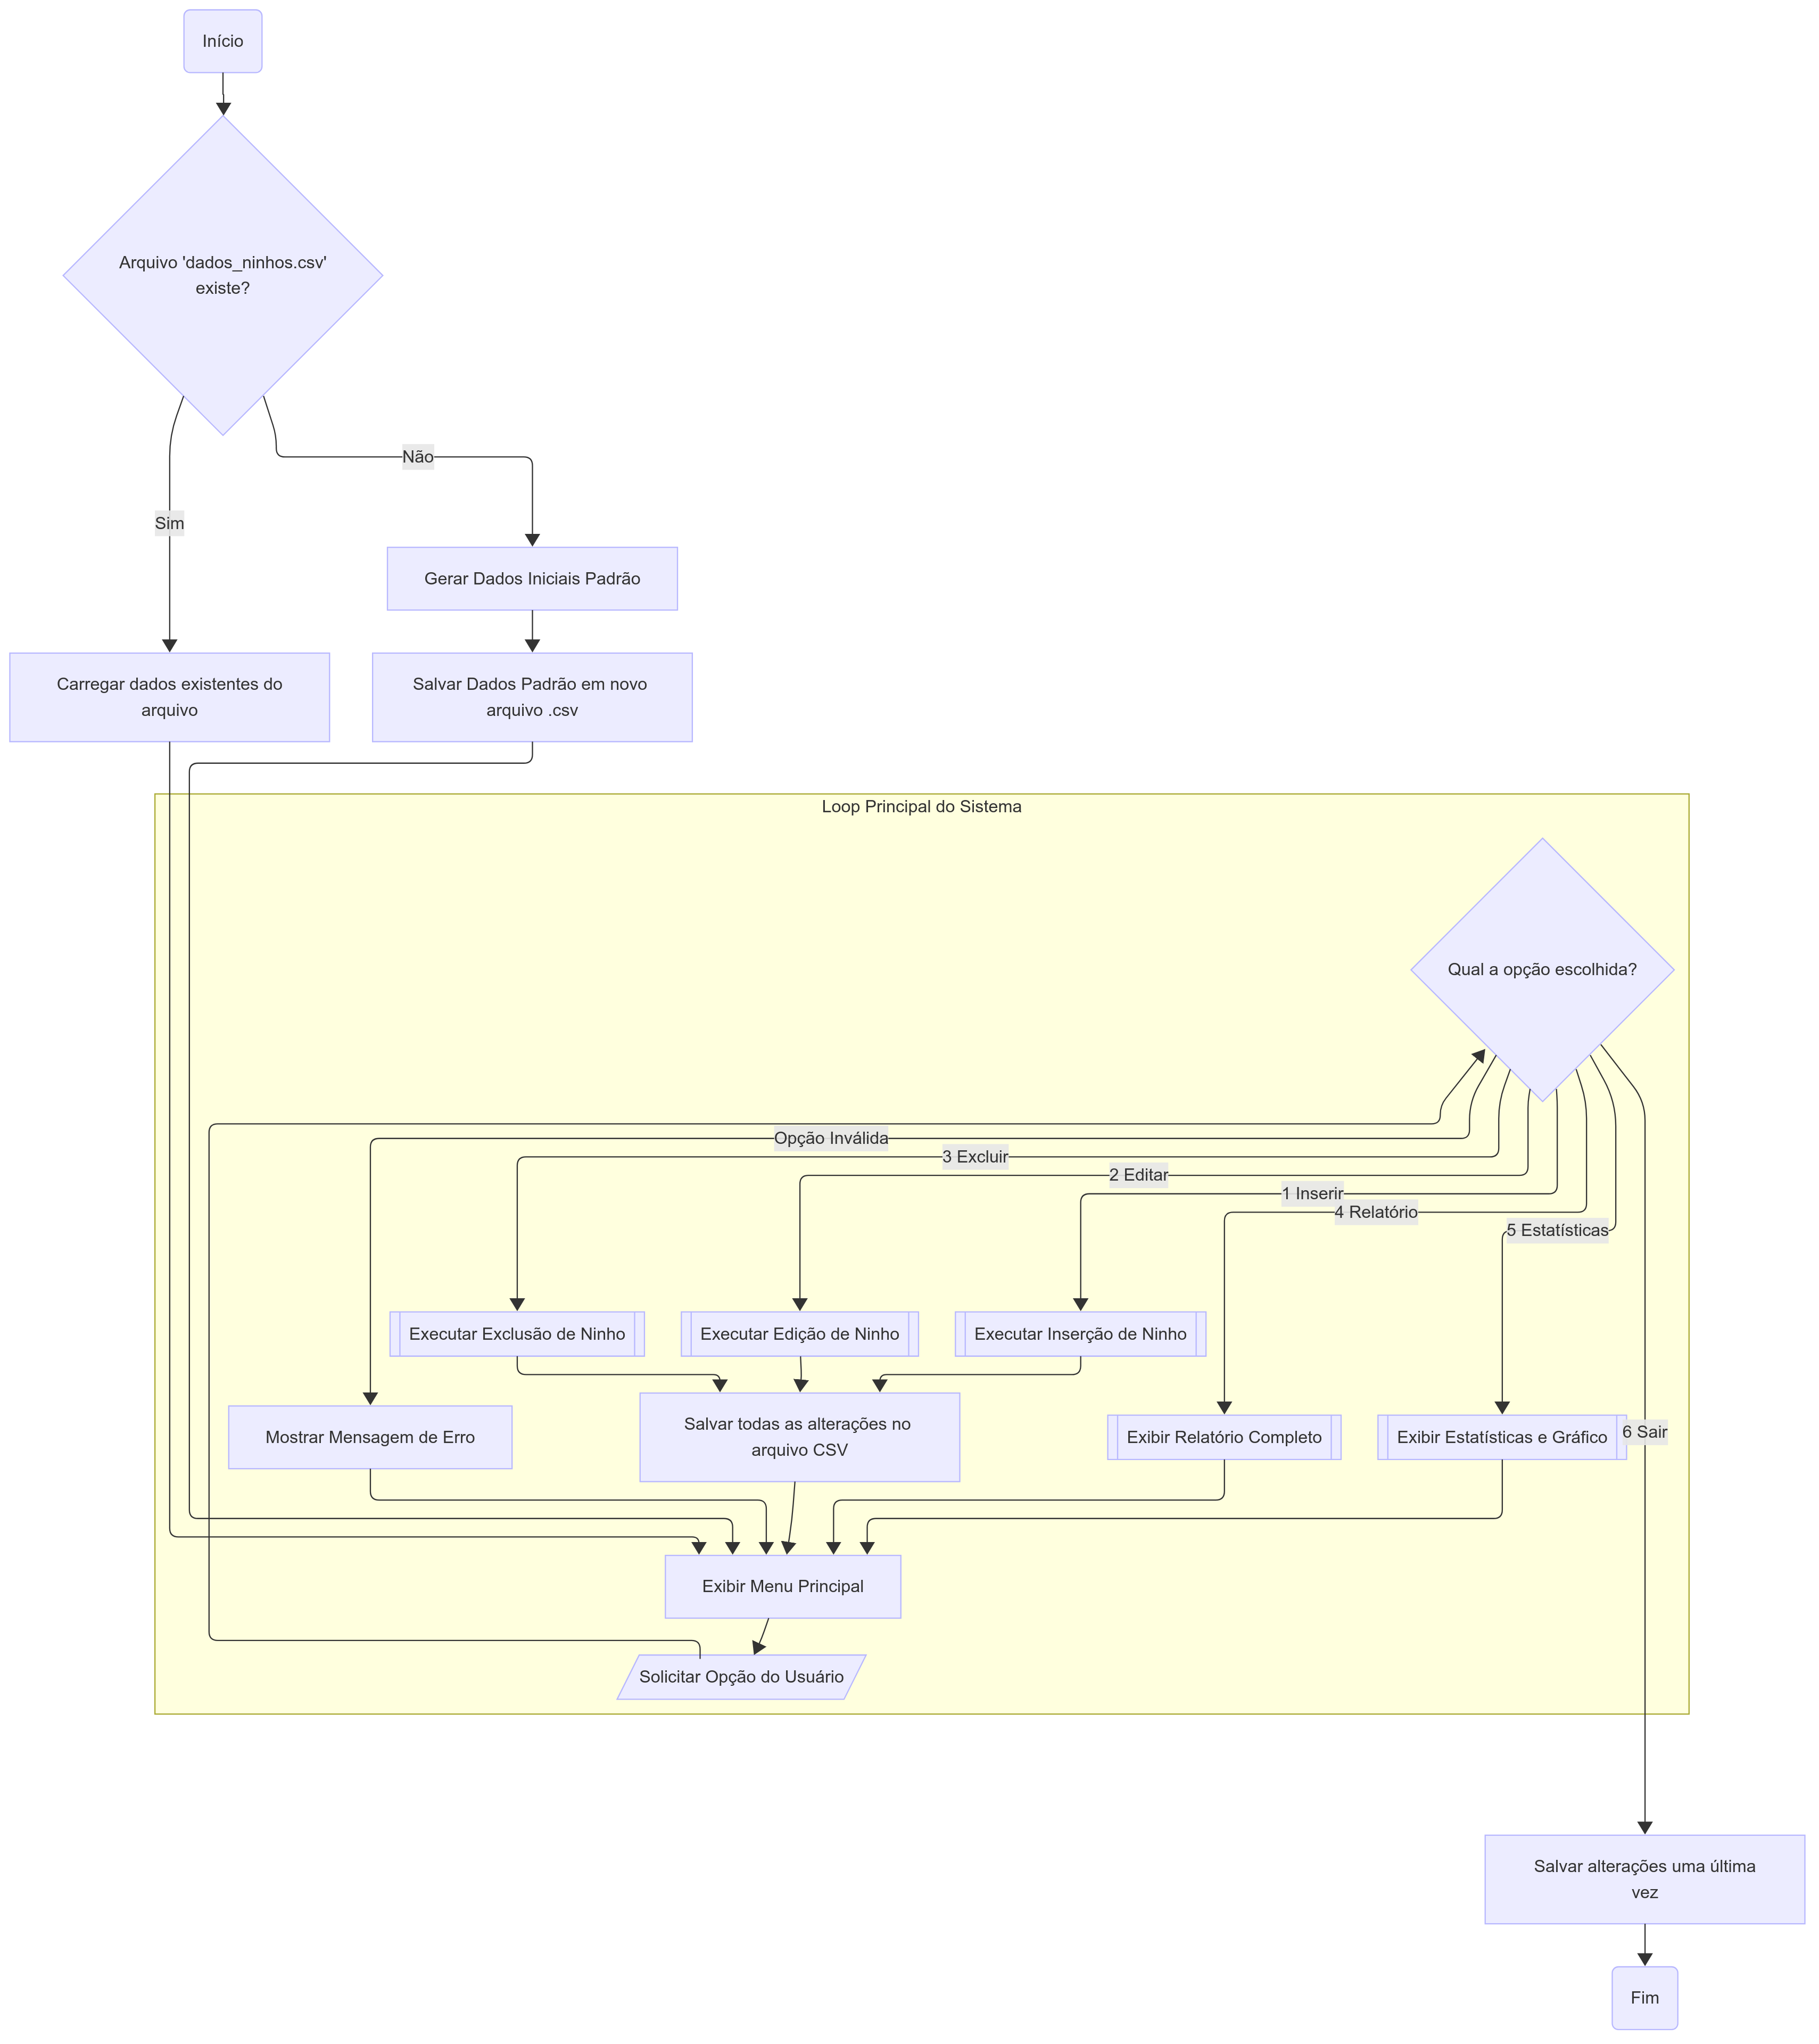